In [1]:
pip install resampy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print(os.getcwd())

/content


In [4]:
data_path = '/content/drive/MyDrive/machine-sound-daata'
print(os.listdir(data_path))

['test', 'val', 'train', 'normal', 'abnormal', '5sec', 'Coffee_Machine_CNN.ipynb']


In [6]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

test
val
train
normal
abnormal
5sec
Coffee_Machine_CNN.ipynb


In [7]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [8]:
from pickle import dump
from pickle import load

In [9]:
train_data = data_path+"/train"
os.listdir(train_data)

['n_00000004_0.wav',
 'n_00000003_0.wav',
 'n_00000000_5000.wav',
 'n_00000001_0.wav',
 'n_00000001_5000.wav',
 'n_00000002_0.wav',
 'n_00000002_5000.wav',
 'n_00000005_0.wav',
 'n_00000005_5000.wav',
 'n_00000007_0.wav',
 'n_00000007_5000.wav',
 'n_00000010_5000.wav',
 'n_00000008_0.wav',
 'n_00000008_5000.wav',
 'n_00000017_0.wav',
 'n_00000017_5000.wav',
 'n_00000011_5000.wav',
 'n_00000013_5000.wav',
 'n_00000016_0.wav',
 'n_00000016_5000.wav',
 'n_00000015_0.wav',
 'n_00000014_0.wav',
 'n_00000012_0.wav',
 'n_00000012_5000.wav',
 'n_00000021_0.wav',
 'n_00000021_5000.wav',
 'n_00000019_5000.wav',
 'n_00000020_0.wav',
 'n_00000023_0.wav',
 'n_00000022_0.wav',
 'n_00000018_5000.wav',
 'n_00000024_0.wav',
 'n_00000024_5000.wav',
 'n_00000025_5000.wav',
 'n_00000030_0.wav',
 'n_00000026_0.wav',
 'n_00000027_0.wav',
 'n_00000029_0.wav',
 'n_00000029_5000.wav',
 'n_00000031_0.wav',
 'n_00000031_5000.wav',
 'n_00000037_5000.wav',
 'n_00000032_0.wav',
 'n_00000038_0.wav',
 'n_00000038_500

In [10]:
val_data = data_path+"/val"
os.listdir(val_data)

['n_00000009_5000.wav',
 'n_00000010_0.wav',
 'n_00000025_0.wav',
 'n_00000030_5000.wav',
 'n_00000026_5000.wav',
 'n_00000027_5000.wav',
 'n_00000028_5000.wav',
 'n_00000037_0.wav',
 'n_00000032_5000.wav',
 'n_00000043_0.wav',
 'n_00000046_0.wav',
 'n_00000050_5000.wav',
 'n_00000052_0.wav',
 'n_00000061_5000.wav',
 'n_00000060_0.wav',
 'n_00000072_0.wav',
 'n_00000078_5000.wav',
 'n_00000076_5000.wav',
 'n_00000075_5000.wav',
 'n_00000085_5000.wav',
 'n_00000081_0.wav',
 'n_00000090_0.wav',
 'n_00000092_5000.wav',
 'n_00000087_0.wav',
 'n_00000099_5000.wav',
 'n_00000098_0.wav',
 'n_00000105_5000.wav',
 'n_00000110_5000.wav',
 'n_00000109_0.wav',
 'n_00000108_5000.wav',
 'n_00000115_0.wav',
 'n_00000117_5000.wav',
 'n_00000128_0.wav',
 'n_00000128_5000.wav',
 'n_00000130_5000.wav',
 'n_00000134_0.wav',
 'n_00000136_5000.wav',
 'n_00000140_0.wav',
 'n_00000141_0.wav',
 'n_00000137_0.wav',
 'n_00000149_5000.wav',
 'n_00000146_0.wav',
 'n_00000145_0.wav',
 'n_00000148_0.wav',
 'n_000001

In [11]:
test_data = data_path+"/test"
os.listdir(test_data)

['n_00000004_5000.wav',
 'n_00000003_5000.wav',
 'n_00000000_0.wav',
 'n_00000009_0.wav',
 'n_00000006_0.wav',
 'n_00000006_5000.wav',
 'n_00000011_0.wav',
 'n_00000013_0.wav',
 'n_00000015_5000.wav',
 'n_00000014_5000.wav',
 'n_00000019_0.wav',
 'n_00000020_5000.wav',
 'n_00000023_5000.wav',
 'n_00000022_5000.wav',
 'n_00000018_0.wav',
 'n_00000028_0.wav',
 'n_00000034_0.wav',
 'n_00000043_5000.wav',
 'n_00000039_5000.wav',
 'n_00000044_0.wav',
 'n_00000049_5000.wav',
 'n_00000052_5000.wav',
 'n_00000055_0.wav',
 'n_00000055_5000.wav',
 'n_00000053_0.wav',
 'n_00000062_0.wav',
 'n_00000065_5000.wav',
 'n_00000064_5000.wav',
 'n_00000063_5000.wav',
 'n_00000067_0.wav',
 'n_00000067_5000.wav',
 'n_00000071_5000.wav',
 'n_00000066_0.wav',
 'n_00000066_5000.wav',
 'n_00000079_0.wav',
 'n_00000079_5000.wav',
 'n_00000077_0.wav',
 'n_00000085_0.wav',
 'n_00000083_5000.wav',
 'n_00000082_0.wav',
 'n_00000086_5000.wav',
 'n_00000080_0.wav',
 'n_00000088_0.wav',
 'n_00000097_5000.wav',
 'n_000

In [12]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [13]:
normal_train

'/content/drive/MyDrive/machine-sound-daata/train/n_*.wav'

In [14]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [15]:
import librosa
import librosa.display

In [16]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [17]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [18]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [19]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [20]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [21]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [22]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [23]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [24]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

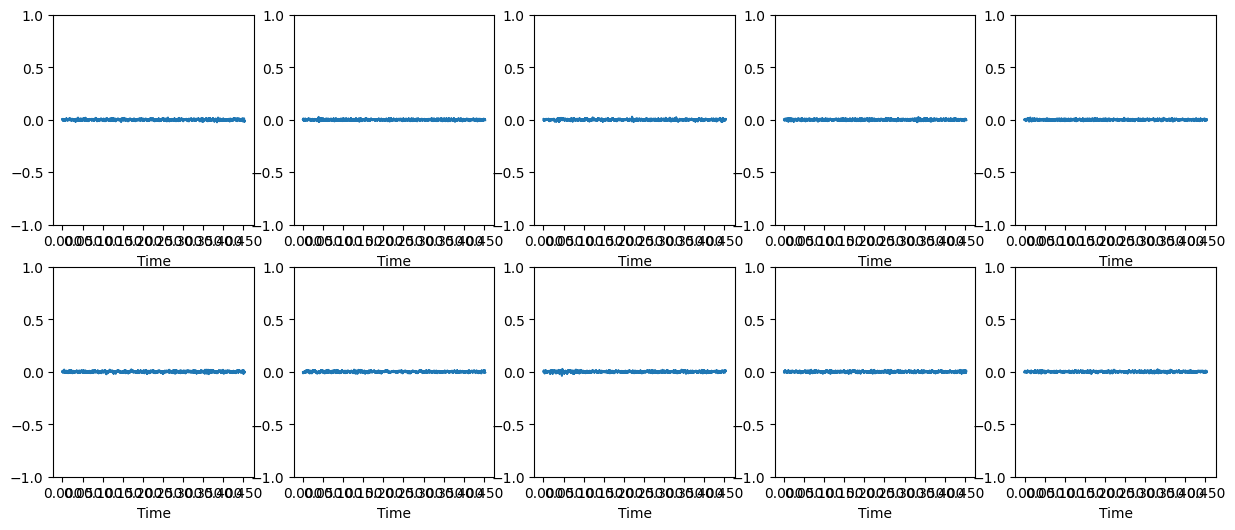

In [25]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

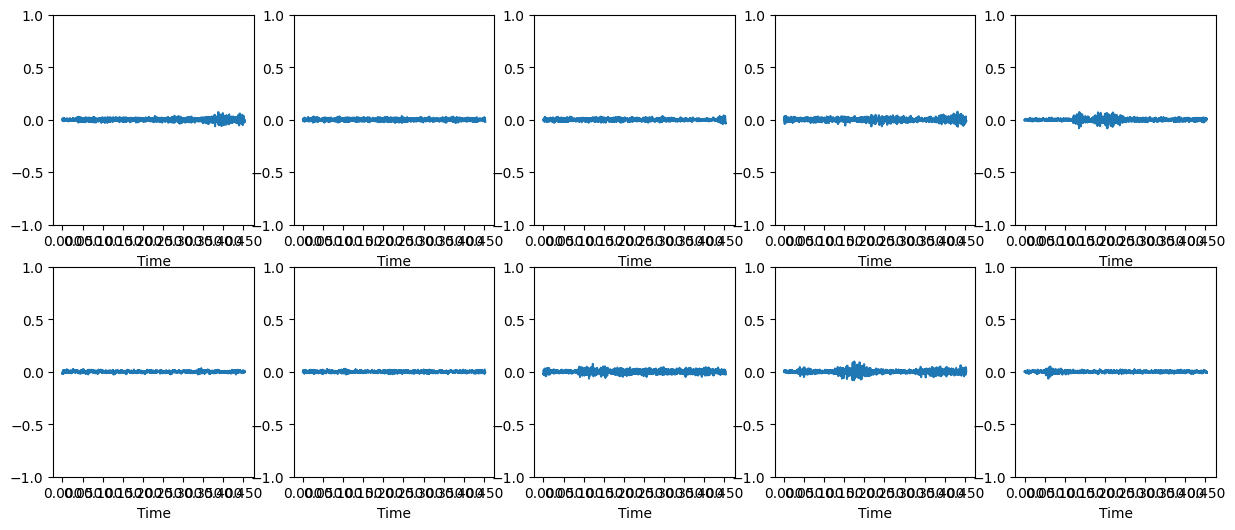

In [26]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [27]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [28]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [29]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [30]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [31]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[4.29687500e-02 1.90580011e+03]
[2.49023438e-02 1.36677989e+03]
[5.66406250e-02 2.03547435e+03]
[4.00390625e-02 1.54595507e+03]


Text(0, 0.5, 'Count')

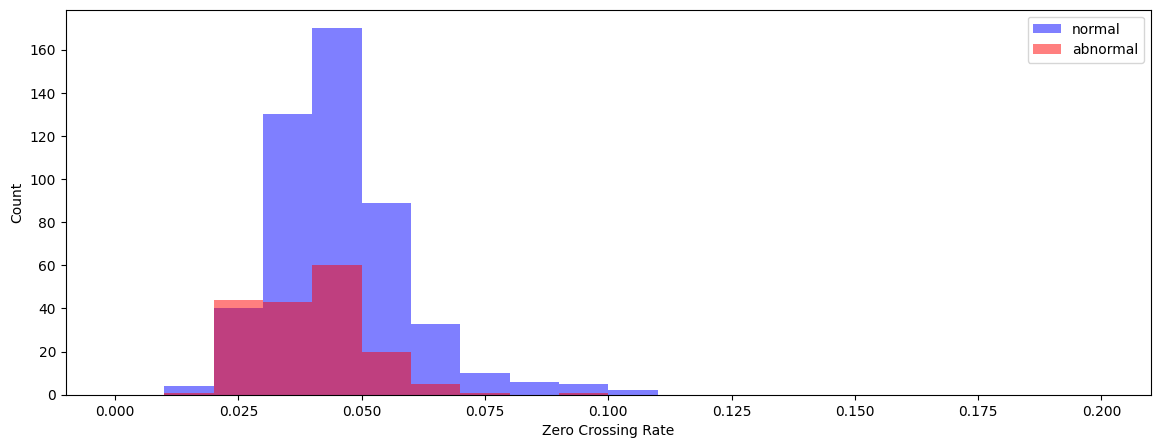

In [32]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

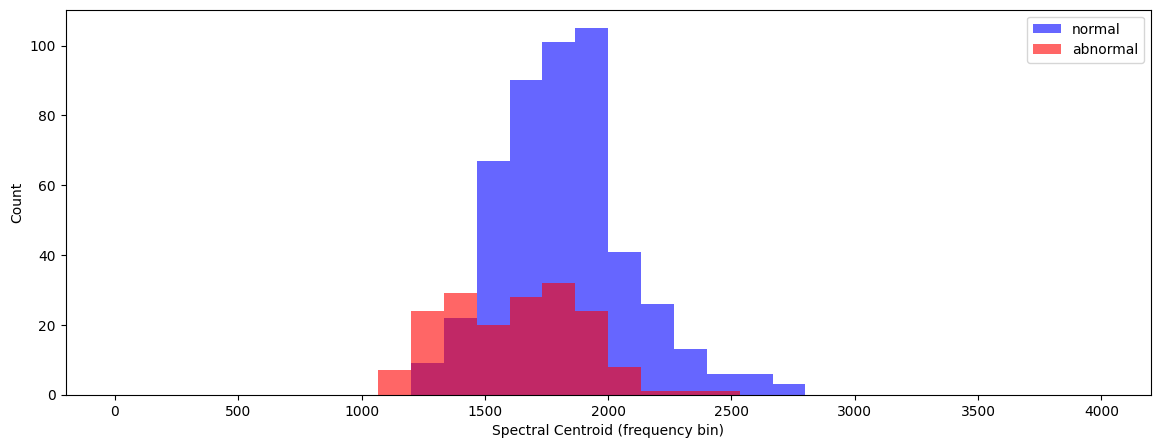

In [33]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [34]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [35]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [36]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [37]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

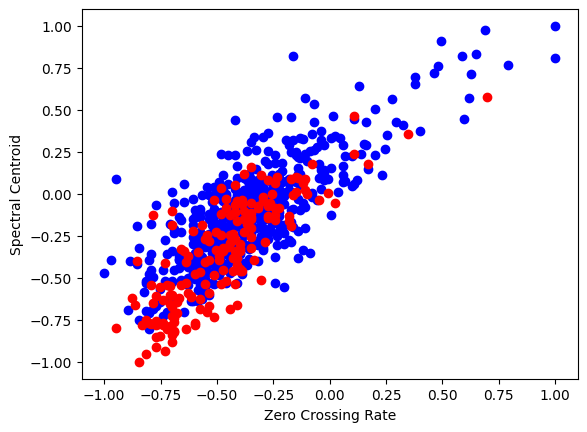

In [38]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [39]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [40]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [41]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [42]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [43]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [44]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [46]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [47]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3999 - loss: 0.7017 - val_accuracy: 0.5301 - val_loss: 0.6900
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6409 - loss: 0.6827 - val_accuracy: 0.7530 - val_loss: 0.6722
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7203 - loss: 0.6620 - val_accuracy: 0.7169 - val_loss: 0.6577
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7498 - loss: 0.6421 - val_accuracy: 0.7169 - val_loss: 0.6449
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6855 - loss: 0.6412 - val_accuracy: 0.7169 - val_loss: 0.6338
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7243 - loss: 0.6218 - val_accuracy: 0.7169 - val_loss: 0.6250
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7356 - loss: 0.6036 - val_accuracy: 0.7169 - val_loss: 0.6178
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7288 - loss: 0.5994 - val_accu

In [49]:
import plotly
import plotly.graph_objs as go

In [50]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [51]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [53]:
file_name = '/content/drive/MyDrive/machine-sound-daata/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


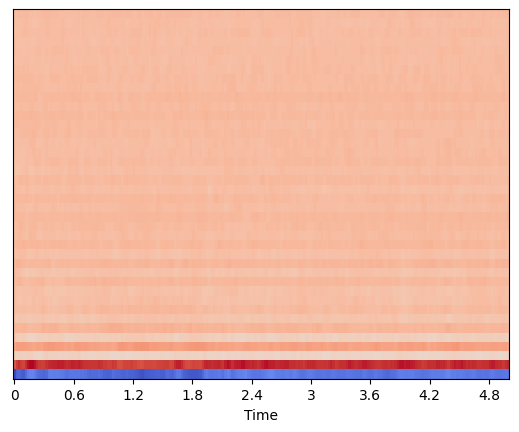

In [54]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [55]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [56]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [57]:
normal_train_features[0].shape

(40, 216)

In [58]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [59]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [60]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [61]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [62]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [63]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [64]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [65]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [66]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [67]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [69]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.6094 - loss: 7.5113
Epoch 1: val_loss improved from inf to 3.55114, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.6114 - loss: 7.4111 - val_accuracy: 0.2831 - val_loss: 3.5511
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.5796 - loss: 2.4790
Epoch 2: val_loss improved from 3.55114 to 0.62689, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step - accuracy: 0.5870 - loss: 2.4767 - val_accuracy: 0.7470 - val_loss: 0.6269
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.5887 - loss: 0.9904
Epoch 3: val_loss improved from 0.62689 to 0.49366, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - accuracy: 0.5907 - loss: 0.9882 - val_accuracy: 0.7410 - val_loss: 0.4937
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.7332 - loss: 0.8498
Epoch 4: val_loss did not improve from 0.49366
11/11 ━

In [70]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [71]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [72]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [73]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.1874, acc: 0.9322
Validation- loss: 0.1920, acc: 0.9277


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [75]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 12  35]]


In [76]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9084    1.0000    0.9520       119
    abnormal     1.0000    0.7447    0.8537        47

    accuracy                         0.9277       166
   macro avg     0.9542    0.8723    0.9028       166
weighted avg     0.9343    0.9277    0.9242       166



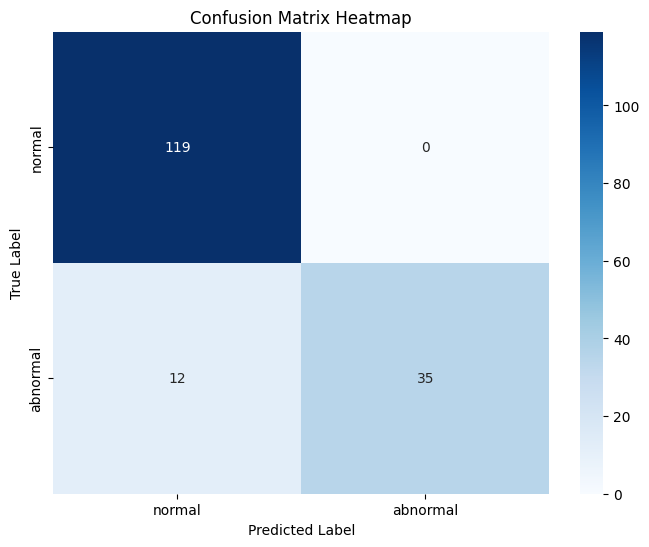

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

##Labweek8

In [78]:
file_name = '/content/drive/MyDrive/machine-sound-daata/test/n_00000255_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

m = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(m.shape)

(110250,) 22050
(40, 216)


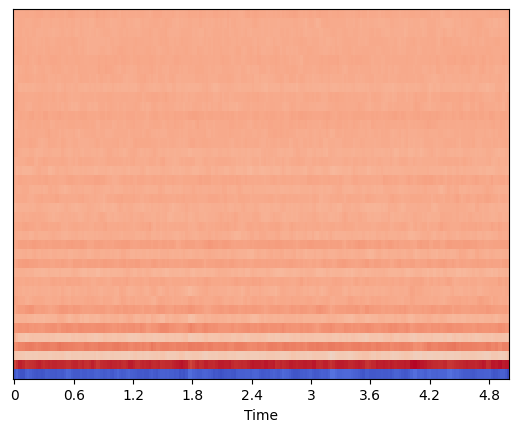

In [79]:
librosa.display.specshow(m, sr=sample_rate, x_axis='time')

In [80]:
max_pad_len = 100

def extract_features(data):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    m = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - m.shape[1]
    m = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return m

In [81]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

    normal_train_features[0].shape

In [82]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [83]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [84]:
y_train_encoded[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [85]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [86]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [87]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [88]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [89]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [90]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [91]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [93]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5956 - loss: 2.9403
Epoch 1: val_loss improved from inf to 0.61471, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.5964 - loss: 2.9169 - val_accuracy: 0.7169 - val_loss: 0.6147
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6151 - loss: 0.9213
Epoch 2: val_loss did not improve from 0.61471
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.6161 - loss: 0.9211 - val_accuracy: 0.7169 - val_loss: 0.6861
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.6461 - loss: 0.6896
Epoch 3: val_loss did not improve from 0.61471
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.6453 - loss: 0.6944 - val_accuracy: 0.7169 - val_loss: 0.6400
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6686 - loss: 0.6854
Epoch 4: val_loss did not improve from 0.61471
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.6671 - loss: 0.6838 - val_ac

In [94]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [95]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [96]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [97]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.6047, acc: 0.7364
Validation- loss: 0.6147, acc: 0.7169


In [98]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [99]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 47   0]]


In [100]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.7169    1.0000    0.8351       119
    abnormal     0.0000    0.0000    0.0000        47

    accuracy                         0.7169       166
   macro avg     0.3584    0.5000    0.4175       166
weighted avg     0.5139    0.7169    0.5986       166



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



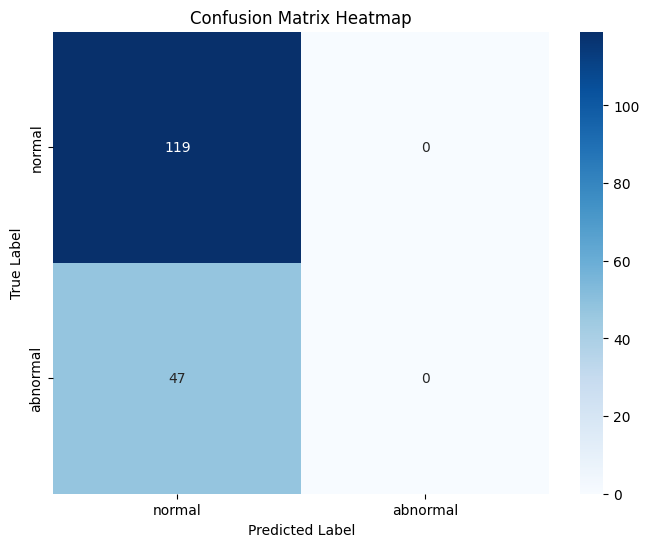

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()